Installing dependencies/libraries

In [1]:
import numpy as np
import pandas as pd
import json

Reading our data using World Bank API directly into the pandas dataframe format

In [2]:
df = pd.read_json('https://finances.worldbank.org/resource/kjmm-jfbk.json')

In [3]:
#Visualizing the first few rows of the read data
pd.set_option('display.max_columns', None)
df.head()

,actual_2015_additional_passengers_upon_implementation_passengers_per_day,actual_2015_co_financing_bilateral_us_m,actual_2015_co_financing_govt_us_m,actual_2015_co_financing_mdb1_us_m,actual_2015_co_financing_others_us_m,actual_2015_co_financing_pvt_us_m,actual_2015_co_financing_total_us_m,actual_2015_energy_savings_annual_gwh_yr,actual_2015_ghg_reductions_annual_tco2_yr,actual_2015_installed_capacity_geothermal_mw,actual_2015_installed_capacity_hydro_mw,actual_2015_installed_capacity_mixed_mw,actual_2015_installed_capacity_solar_mw,actual_2015_installed_capacity_total_mw,actual_2015_installed_capacity_wind_mw,country,ctf_funding_usd,cumulative_additional_passengers_upon_implementation_passengers_per_day,cumulative_co_financing_bilateral_us_m,cumulative_co_financing_govt_us_m,cumulative_co_financing_mdb1_us_m,cumulative_co_financing_others_us_m,cumulative_co_financing_pvt_us_m,cumulative_co_financing_total_us_m,cumulative_energy_savings_annual_gwh_yr,cumulative_ghg_reductions_annual_tco2_yr,cumulative_installed_capacity_geothermal_mw,cumulative_installed_capacity_hydro_mw,cumulative_installed_capacity_mixed_mw,cumulative_installed_capacity_solar_mw,cumulative_installed_capacity_total_mw,cumulative_installed_capacity_wind_mw,expected_additional_passengers_upon_implementation_passengers_per_day,expected_co_financing_bilateral_us_m,expected_co_financing_govt_us_m,expected_co_financing_mdb1_us_m,expected_co_financing_others_us_m,expected_co_financing_pvt_us_m,expected_co_financing_total_us_m,expected_energy_savings_annual_gwh_yr,expected_ghg_reductions_annual_tco2_yr,expected_ghg_reductions_lifetime_tco2,expected_installed_capacity_geothermal_mw,expected_installed_capacity_hydro_mw,expected_installed_capacity_mixed_mw,expected_installed_capacity_solar_mw,expected_installed_capacity_total_mw,expected_installed_capacity_wind_mw,fund,lifetime_where_available,mdb_1,project_title,public_private,region,ry,specific_technology,technology_focus
0,0,0,0,32.0,0,0,32,0,0.0,0,0,0,0,0,0,Morocco,25,0,0.0,0.0,34.0,0.0,0.0,32.0,0,0.0,0,0,0,0,0,0,0,0,9,125,0,0,134,0,78018,1950000,0,0,0,75,75,0,CTF,25,IBRD,Clean and Efficient Energy Project,Public,Africa,2017,Solar,Renewable Energy
1,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,Turkey,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,100,0,290,390,30,14000,420000,0,0,0,0,0,0,CTF,30,IFC,Commercial Sustainable Energy Finance(CSEF) Ph...,Private,Europe and Central Asia,2017,EE-Other,Energy Efficiency
2,0,0,0,0.0,0,0,0,110,145800.0,0,0,0,0,0,0,Turkey,22,0,0.0,0.0,95.0,0.0,0.0,95.0,508,633500.0,0,0,0,0,0,0,0,0,0,80,0,0,80,220,280000,2800000,0,0,0,0,0,0,CTF,10,IFC,Commercializing Sustainable Energy Finance Pr...,Private,Europe and Central Asia,2017,EE-End USe,Energy Efficiency
3,0,0,0,0.0,0,0,0,0,0.0,0,0,0,0,0,0,Chile,67,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,143,20,66,0,130,359,0,129300,3879000,0,0,0,50,50,0,CTF,30,IDB,Concentrated Solar Power Project (CSPP),Private,Latin America and Caribbean,2017,Solar,Renewable Energy
4,0,0,0,9.0,0,0,9,0,0.0,0,0,0,0,0,0,Ukraine,51,0,0.0,0.0,12.0,0.0,0.0,12.0,0,0.0,0,0,0,0,0,0,0,0,0,332,0,0,332,560,330000,5260000,0,0,0,0,0,0,CTF,20,IBRD,District Heating Energy Efficiency,Public,Europe and Central Asia,2017,EE-District Heating,Energy Efficiency


In [4]:
# Checking the data types of the columns of the read data
df.dtypes

actual_2015_additional_passengers_upon_implementation_passengers_per_day      int64
actual_2015_co_financing_bilateral_us_m                                       int64
actual_2015_co_financing_govt_us_m                                            int64
actual_2015_co_financing_mdb1_us_m                                          float64
actual_2015_co_financing_others_us_m                                          int64
actual_2015_co_financing_pvt_us_m                                             int64
actual_2015_co_financing_total_us_m                                           int64
actual_2015_energy_savings_annual_gwh_yr                                      int64
actual_2015_ghg_reductions_annual_tco2_yr                                   float64
actual_2015_installed_capacity_geothermal_mw                                  int64
actual_2015_installed_capacity_hydro_mw                                       int64
actual_2015_installed_capacity_mixed_mw                                     

In [5]:
# Finding projects(unique)  using the unique method 
df['project_title'].unique()

array(['Clean and Efficient Energy Project',
       'Commercial Sustainable Energy Finance(CSEF) Phase II',
       'Commercializing  Sustainable Energy Finance Program (CSEF)',
       'Concentrated Solar Power Project (CSPP)',
       'District Heating Energy Efficiency',
       'District Heating Modernisation Program',
       'District Heating Modernization Framework',
       'ECOCASA Program-Energy Efficiency Program Part II', 'EE Program',
       'Efficient Lighting and Appliance Project',
       'Energy Efficiency and Self-Supply Renewable Energy Program',
       'Energy Efficiency Financing Program for the Services Sector',
       'Energy Efficiency Program in the San Andrés, Providencia and Santa Catalina Archipelago',
       'Energy Efficiency Program-Part 1',
       'Energy Efficient Electric Vehicles project',
       'ESKOM Renewable Support Project-CSP',
       'ESKOM Renewable Support Project-Wind',
       'Expansion of the Approved South Africa Sustainable Energy Acceleratio

In [6]:
# Finding the number of projects(unique) using the nunique method 
df['project_title'].nunique()

81

In [7]:
# Number of projects funded under different categories of focussed technology using the value_counts() method 
df['technology_focus'].value_counts()

Renewable Energy                        50
Energy Efficiency                       22
Transport                                8
Renewable Energy / Energy Efficiency     7
Name: technology_focus, dtype: int64

Plotting the above result in form of a bar graph

Text(0.5, 1.0, 'Number of projects by technology')

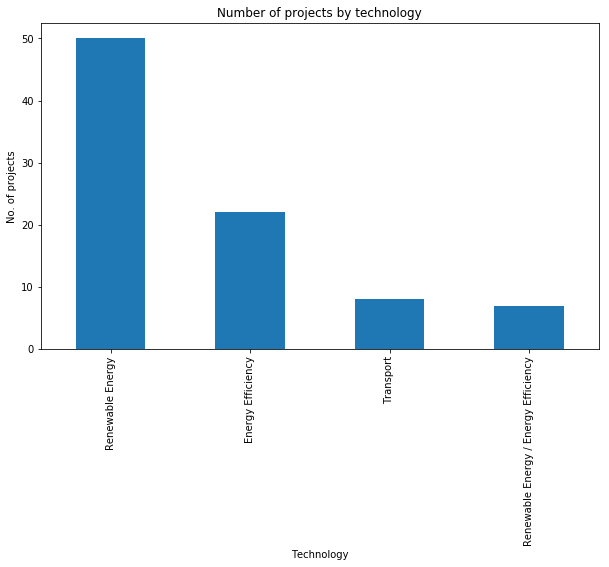

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df['technology_focus'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Technology')
plt.ylabel('No. of projects')
plt.title('Number of projects by technology')

In [9]:
#Different multilateral development banks and the number of projects funded by them using the value_counts() method
df['mdb_1'].value_counts()

IBRD    21
IDB     20
IFC     16
EBRD    14
ADB     10
AfDB     6
Name: mdb_1, dtype: int64

Plotting the above result

Text(0.5, 1.0, 'No. of projects undertaken by different MDBs')

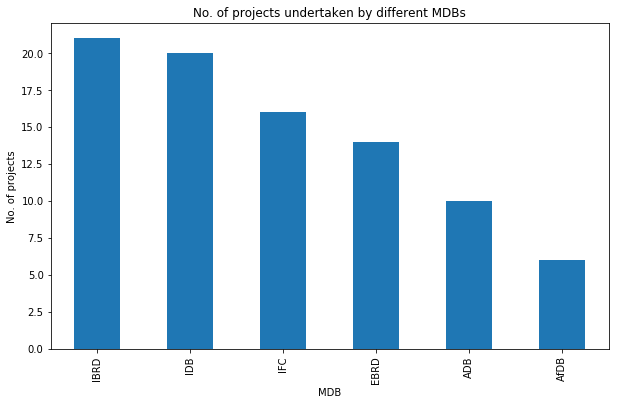

In [10]:
df['mdb_1'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('MDB')
plt.ylabel('No. of projects')
plt.title('No. of projects undertaken by different MDBs')

Finding the amount of total CTF funding allocation w.r.t. to Region

In [11]:
df.groupby(['region'])['ctf_funding_usd'].sum()

region
Africa                         1288
Asia                           1593
Europe and Central Asia         904
Latin America and Caribbean     905
Name: ctf_funding_usd, dtype: int64

Plotting the results

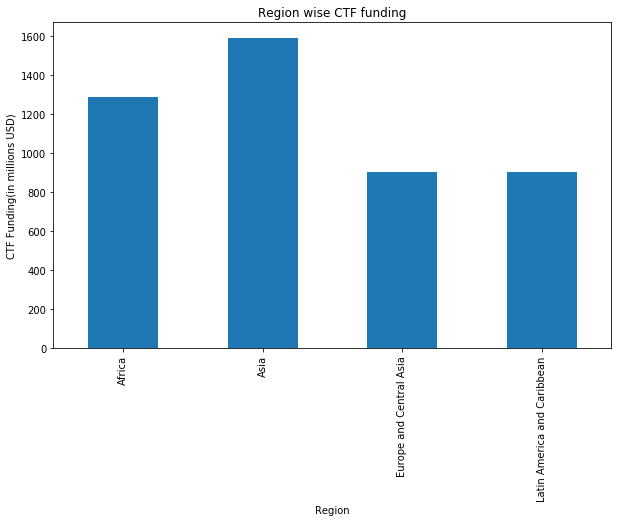

In [12]:
df.groupby(['region'])['ctf_funding_usd'].sum().plot(kind = 'bar', figsize = (10,6))
plt.xlabel('Region')
plt.ylabel('CTF Funding(in millions USD)')
plt.title('Region wise CTF funding')
plt.show()

No. of Public and Private Imvestments

Text(0.5, 1.0, 'Number of public and private investments')

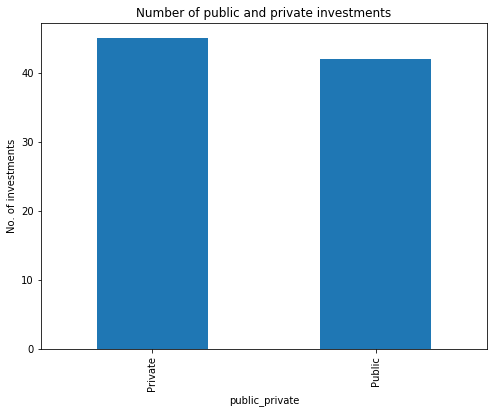

In [13]:
# Using groupby method to get the no. of public and private investments and then plotting the results 
df.groupby(['public_private'])['ry'].count().plot(kind =  'bar', figsize = (8,6))
plt.ylabel('No. of investments')
plt.title('Number of public and private investments')

Finding the maximum and mean of total cumulative co-financing by Region

In [14]:
df.groupby('region').cumulative_co_financing_total_us_m.agg(['max','mean'])

,max,mean
region,,
Africa,1502.0,340.384615
Asia,982.0,108.520000
Europe and Central Asia,3000.0,227.916667
Latin America and Caribbean,3550.0,337.227273


Plotting the above result

Text(0.5, 1.0, 'Regionwise Max and Mean Cumulative co-financing')

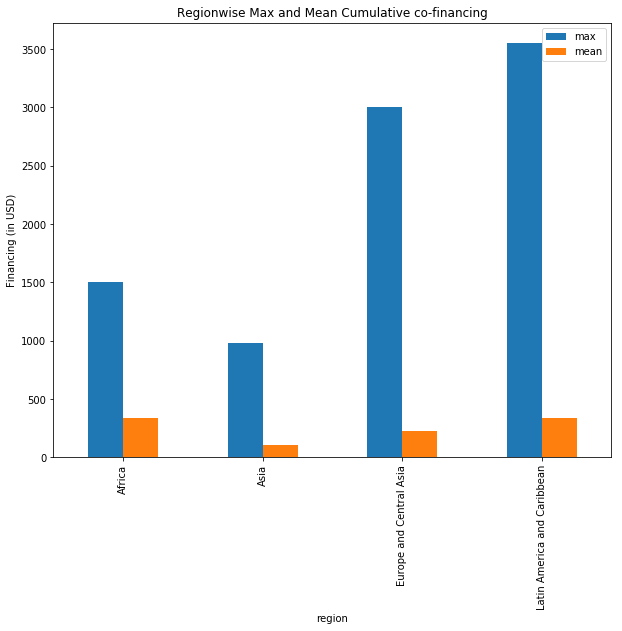

In [15]:
df.groupby('region').cumulative_co_financing_total_us_m.agg(['max','mean']).plot(kind = 'bar', figsize = (10,8))
plt.ylabel('Financing (in USD)')
plt.title('Regionwise Max and Mean Cumulative co-financing')

Finding the maximum and mean of Public and Private co-financing and plotting the results

In [16]:
df.groupby('public_private').cumulative_co_financing_total_us_m.agg(['max','mean'])

,max,mean
public_private,,
Private,1502.0,150.000000
Public,3550.0,326.833333


Text(0.5, 1.0, 'Max and Mean Public and Private financing')

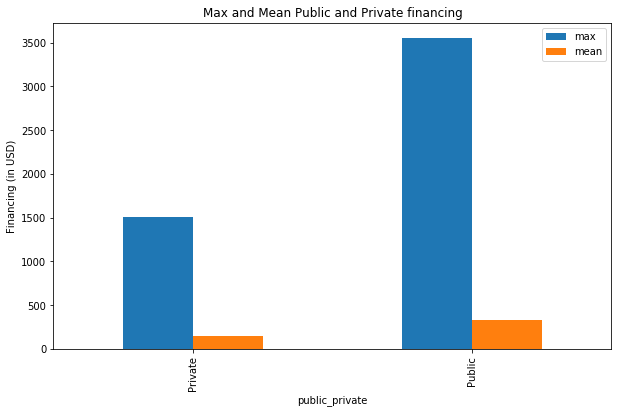

In [17]:
df.groupby('public_private').cumulative_co_financing_total_us_m.agg(['max','mean']).plot(kind = 'bar', figsize = (10,6))
plt.ylabel('Financing (in USD)')
plt.title('Max and Mean Public and Private financing')

Comparing the expected and actual total co-financing by region

In [18]:
Expected = df.groupby(['region'])['expected_co_financing_total_us_m'].sum()
Actual = df.groupby(['region'])['actual_2015_co_financing_total_us_m'].sum()

Plotting the same

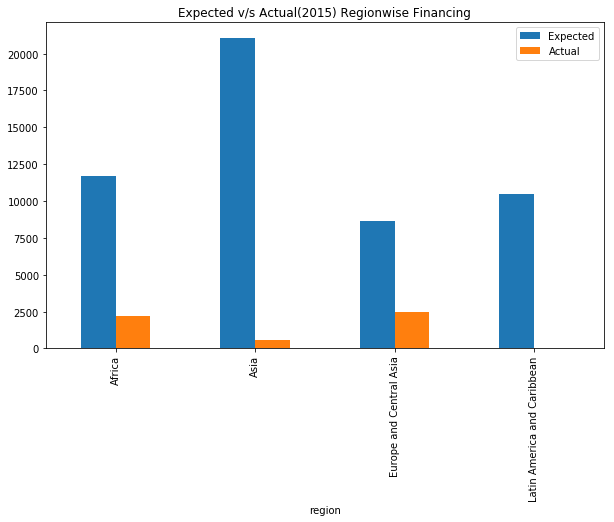

In [19]:
#Putting the compared results in a dataframe and using the plot method on the dataframe 
pd.DataFrame({'Expected':Expected,
              'Actual': Actual}).plot(kind = 'bar', figsize = (10,6), title = 'Expected v/s Actual(2015) Regionwise Financing')

Comparing the Expected co-financing by respective institutions

In [20]:
#Expected co-financing from Government
G = df.groupby(['region']).expected_co_financing_govt_us_m.sum()

#Expected co-financing  from Private Institutions
P = df.groupby(['region']).expected_co_financing_pvt_us_m.sum()

#Expected co-financing from Multilateral development banks
M = df.groupby(['region']).expected_co_financing_mdb1_us_m.sum()

#Bilateral expected co-financing
B = df.groupby(['region']).expected_co_financing_bilateral_us_m.sum()

#Co-financing expected from other sources
O = df.groupby(['region']).expected_co_financing_others_us_m.sum()

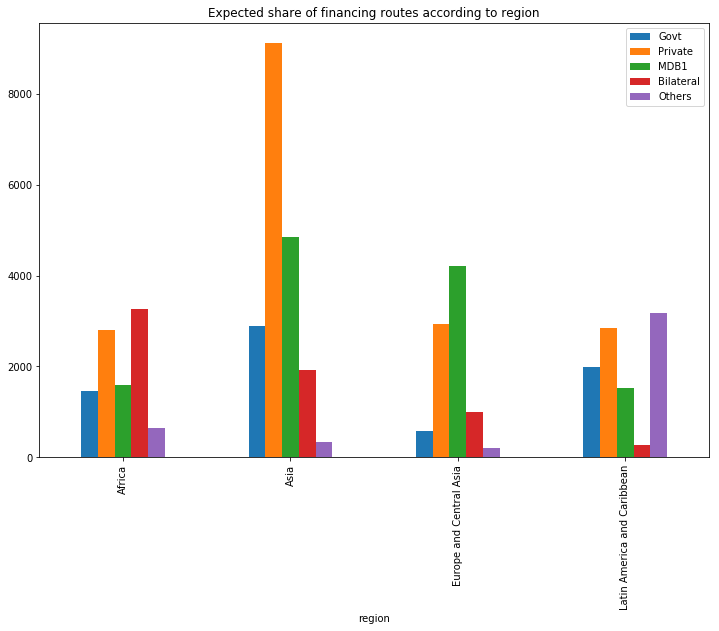

In [21]:
#Putting the results in a dataframe and plotting them
pd.DataFrame({'Govt':G, 
              'Private': P, 
              'MDB1':M, 
              'Bilateral': B,
              'Others': O}).plot(kind = 'bar', 
                                 figsize = (12,8),
                                 title = 'Expected share of financing routes according to region')

Comparing the Actual co-financing by respective institutions

In [22]:
#Expected co-financing from Government
GA = df.groupby(['region']).actual_2015_co_financing_govt_us_m.sum()

#Expected co-financing from Private Institutions
PA = df.groupby(['region']).actual_2015_co_financing_pvt_us_m.sum()

#Expected co-financing from Multilteral development banks
MA = df.groupby(['region']).actual_2015_co_financing_mdb1_us_m.sum()

#Expected co-financing from Bilateral
BA = df.groupby(['region']).actual_2015_co_financing_bilateral_us_m.sum()

#Expected co-financing from Other sources
OA = df.groupby(['region']).actual_2015_co_financing_others_us_m.sum()

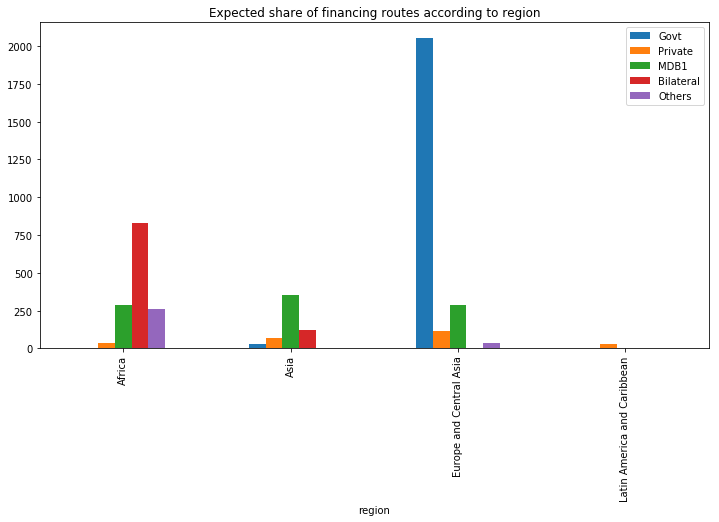

In [23]:
#Putting the results in a dataframe and plotting them
pd.DataFrame({'Govt':GA, 
              'Private': PA, 
              'MDB1':MA, 
              'Bilateral': BA,
              'Others': OA}).plot(kind = 'bar', 
                                 figsize = (12,6),
                                 title = 'Expected share of financing routes according to region')

Countries with the most CTF Funding

In [24]:
#Grouping by countries and sorting the 10 countries with the most Funding
df.groupby(['country'])['ctf_funding_usd'].sum().sort_values(ascending = False).head(10)

country
India            725
Mexico           518
South Africa     493
MENA-CSP         435
Turkey           405
Indonesia        375
Ukraine          337
Chile            192
Vietnam          180
DPSP-Regional    174
Name: ctf_funding_usd, dtype: int64

Text(0.5, 1.0, 'Top 10 countries with the most CTF Funding(in USD)')

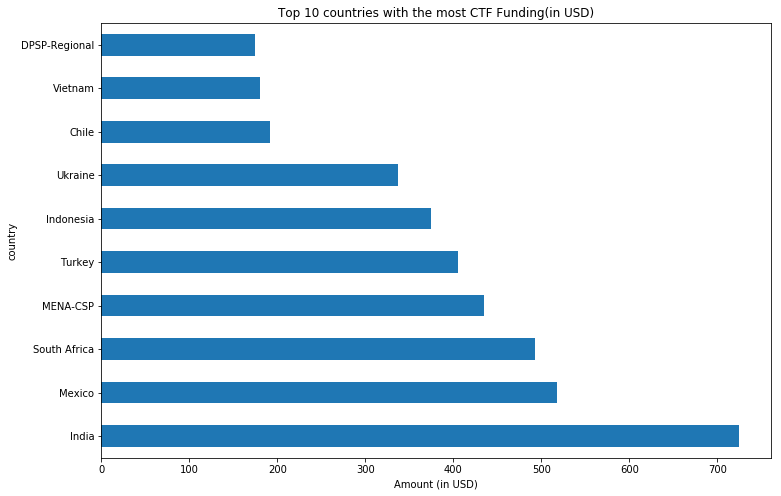

In [25]:
#Plotting the above results in the form of a horizontal bar chart
df.groupby(['country'])['ctf_funding_usd'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh', figsize = (12,8))
plt.xlabel('Amount (in USD)')
plt.title('Top 10 countries with the most CTF Funding(in USD)')

Countrywise GHG reductions

In [26]:
#Country wise annual GHG reductions in tonnes of co2 per year 
GHG = df.groupby(['country'])['expected_ghg_reductions_annual_tco2_yr'].sum().sort_values(ascending = False).head(10)
GHG

country
India            18015635
Indonesia         9530000
Mexico            7120742
Turkey            6343371
Ukraine           4752683
Morocco           4125518
South Africa      2216667
Philippines       1722262
DPSP-Regional     1521000
Egypt             1400000
Name: expected_ghg_reductions_annual_tco2_yr, dtype: int64

Text(0.5, 0, 'tonnes of co2 (tco2)')

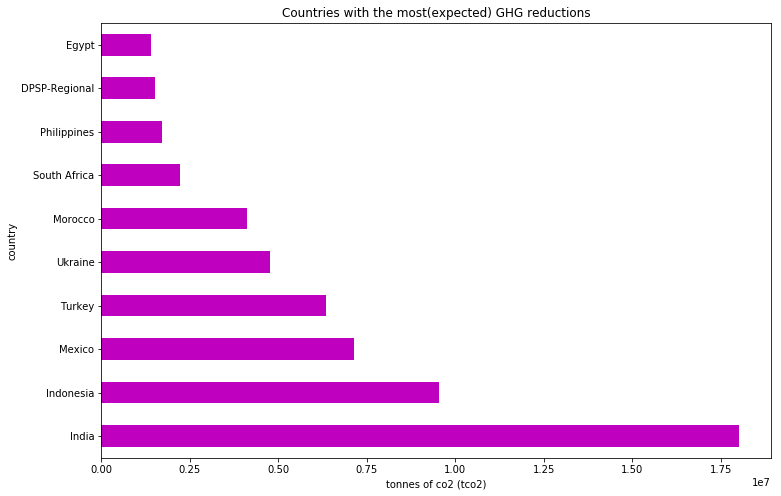

In [33]:
#Plotting the above results
GHG.plot(kind = 'barh', figsize = (12,8), title = 'Countries with the most(expected) GHG reductions', color = 'm')
plt.xlabel('tonnes of co2 (tco2)')

Country wise cumulative ghg reductions annually

In [28]:
cum_ghg_red = df.groupby(['country'])['cumulative_ghg_reductions_annual_tco2_yr'].sum().sort_values(ascending = False).head(10)

Text(0.5, 0, 'tonnes of co2 (tco2)')

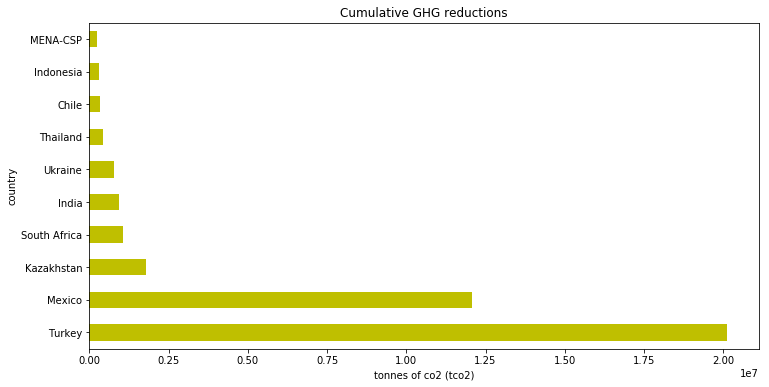

In [32]:
#Plotting the results
cum_ghg_red.plot(kind = 'barh', figsize = (12,6), title = 'Cumulative GHG reductions', color = 'y')
plt.xlabel('tonnes of co2 (tco2)')

Countrywise cumulative co-financing and plotting the results in the form of a horizontal bar chart

Text(0.5, 0, 'Amount(in USD)')

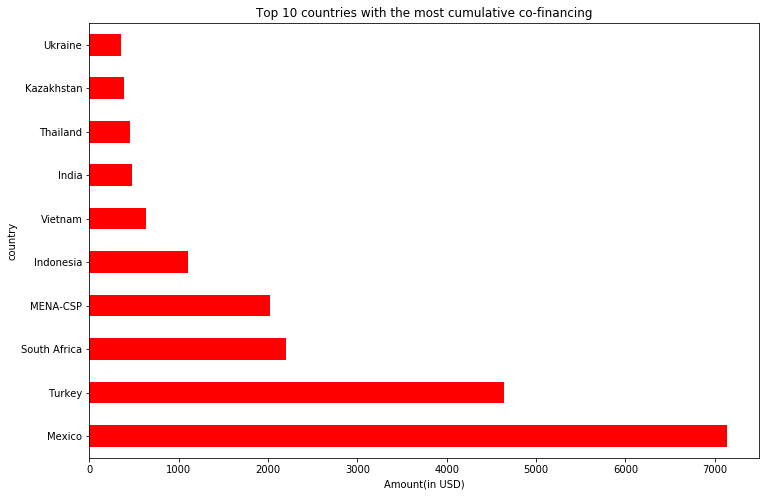

In [31]:
Cum_cofinancing = df.groupby(['country'])['cumulative_co_financing_total_us_m'].sum().sort_values(ascending = False).head(10)
Cum_cofinancing.plot(kind = 'barh', figsize = (12,8),
                     title = 'Top 10 countries with the most cumulative co-financing',
                     color = 'r')
plt.xlabel('Amount(in USD)')